# Quiz9DNN model on CIFAR10
---

**Test Accuracy: 87.57%**

[Link to Google Colab Code File](https://colab.research.google.com/drive/1yavDBYpQn6NHD_wTzpBbAJ5-y58FJo_X)

[Link to python helper files](https://github.com/genigarus/EVA4/tree/master/API)

In [2]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 20:10:57.452379


## Google Drive Connection

In [3]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [5]:
import os
default_path = 'drive/EVA4/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/API


# Imports

In [6]:
from __future__ import print_function
import math
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

%matplotlib inline
import matplotlib.pyplot as plt

!pip install torchsummary
from torchsummary import summary

# Model

In [0]:
from models import *

# Training Code


In [0]:
from training_testing import train

# Testing Code

In [0]:
from training_testing import test

# Regularization

In [0]:
from regularization import *

# Dataloader/Transformations/Image-augmentations


In [0]:
from data_loader import generate_train_test_loader


# Misc Items like finding misclassified images

In [0]:
from utility import *

# Execution(Run models for 40 epochs)

In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session9/Quiz9"

## Generating Data Loaders

In [14]:
SEED = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
DATA_PATH = PATH+'/data'

train_loader, test_loader, test_data = generate_train_test_loader(DATA_PATH, SEED, means, stdevs)

Files already downloaded and verified
Files already downloaded and verified


**************************************************
********** With Quiz9_DNN_Net model **********
**************************************************

 Initializing...
Creating model...

 Model Summary:


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           3,072
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          73,728
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
          Dropout-14           [-1, 64,

Loss=1.3143869638442993 Batch_id=390 Accuracy=47.34: 100%|██████████| 391/391 [00:24<00:00, 16.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 5805/10000 (58.05%)

EPOCH: 2


Loss=0.8309019804000854 Batch_id=390 Accuracy=65.30: 100%|██████████| 391/391 [00:24<00:00, 16.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 6967/10000 (69.67%)

EPOCH: 3


Loss=0.6551859974861145 Batch_id=390 Accuracy=73.43: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7429/10000 (74.29%)

EPOCH: 4


Loss=0.7733100652694702 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:24<00:00, 16.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7625/10000 (76.25%)

EPOCH: 5


Loss=0.7503154277801514 Batch_id=390 Accuracy=80.58: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7836/10000 (78.36%)

EPOCH: 6


Loss=0.6121125817298889 Batch_id=390 Accuracy=82.48: 100%|██████████| 391/391 [00:24<00:00, 16.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8100/10000 (81.00%)

EPOCH: 7


Loss=0.5469200611114502 Batch_id=390 Accuracy=84.10: 100%|██████████| 391/391 [00:24<00:00, 16.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8242/10000 (82.42%)

EPOCH: 8


Loss=0.5507308840751648 Batch_id=390 Accuracy=85.17: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8354/10000 (83.54%)

EPOCH: 9


Loss=0.42561960220336914 Batch_id=390 Accuracy=86.38: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8409/10000 (84.09%)

EPOCH: 10


Loss=0.5654879212379456 Batch_id=390 Accuracy=86.89: 100%|██████████| 391/391 [00:24<00:00, 16.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8466/10000 (84.66%)

EPOCH: 11


Loss=0.4457092881202698 Batch_id=390 Accuracy=87.80: 100%|██████████| 391/391 [00:23<00:00, 16.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8443/10000 (84.43%)

EPOCH: 12


Loss=0.522122859954834 Batch_id=390 Accuracy=88.41: 100%|██████████| 391/391 [00:24<00:00, 16.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8319/10000 (83.19%)

EPOCH: 13


Loss=0.6138730049133301 Batch_id=390 Accuracy=89.02: 100%|██████████| 391/391 [00:24<00:00, 16.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8643/10000 (86.43%)

EPOCH: 14


Loss=0.43337422609329224 Batch_id=390 Accuracy=89.38: 100%|██████████| 391/391 [00:24<00:00, 16.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8650/10000 (86.50%)

EPOCH: 15


Loss=0.5807373523712158 Batch_id=390 Accuracy=89.77: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8655/10000 (86.55%)

EPOCH: 16


Loss=0.4767274856567383 Batch_id=390 Accuracy=90.30: 100%|██████████| 391/391 [00:24<00:00, 16.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8569/10000 (85.69%)

EPOCH: 17


Loss=0.6052642464637756 Batch_id=390 Accuracy=90.62: 100%|██████████| 391/391 [00:24<00:00, 16.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8565/10000 (85.65%)

EPOCH: 18


Loss=0.3778838515281677 Batch_id=390 Accuracy=90.95: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8688/10000 (86.88%)

EPOCH: 19


Loss=0.3270609378814697 Batch_id=390 Accuracy=91.19: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8613/10000 (86.13%)

EPOCH: 20


Loss=0.4802721440792084 Batch_id=390 Accuracy=91.29: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8654/10000 (86.54%)

EPOCH: 21


Loss=0.28146374225616455 Batch_id=390 Accuracy=91.68: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8568/10000 (85.68%)

EPOCH: 22


Loss=0.4248523712158203 Batch_id=390 Accuracy=91.80: 100%|██████████| 391/391 [00:24<00:00, 16.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8698/10000 (86.98%)

EPOCH: 23


Loss=0.37555012106895447 Batch_id=390 Accuracy=92.18: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8704/10000 (87.04%)

EPOCH: 24


Loss=0.31919440627098083 Batch_id=390 Accuracy=92.03: 100%|██████████| 391/391 [00:24<00:00, 16.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8658/10000 (86.58%)

EPOCH: 25


Loss=0.5101848840713501 Batch_id=390 Accuracy=92.67: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8669/10000 (86.69%)

EPOCH: 26


Loss=0.2841768264770508 Batch_id=390 Accuracy=92.75: 100%|██████████| 391/391 [00:24<00:00, 16.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8781/10000 (87.81%)

EPOCH: 27


Loss=0.2952617406845093 Batch_id=390 Accuracy=92.95: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8731/10000 (87.31%)

EPOCH: 28


Loss=0.34036293625831604 Batch_id=390 Accuracy=92.91: 100%|██████████| 391/391 [00:24<00:00, 16.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8761/10000 (87.61%)

EPOCH: 29


Loss=0.23292863368988037 Batch_id=390 Accuracy=93.04: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8762/10000 (87.62%)

EPOCH: 30


Loss=0.22539706528186798 Batch_id=390 Accuracy=93.22: 100%|██████████| 391/391 [00:24<00:00, 16.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8714/10000 (87.14%)

EPOCH: 31


Loss=0.322338342666626 Batch_id=390 Accuracy=93.35: 100%|██████████| 391/391 [00:24<00:00, 16.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8771/10000 (87.71%)

EPOCH: 32


Loss=0.39602160453796387 Batch_id=390 Accuracy=93.28: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8720/10000 (87.20%)

EPOCH: 33


Loss=0.39842942357063293 Batch_id=390 Accuracy=93.45: 100%|██████████| 391/391 [00:24<00:00, 16.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8730/10000 (87.30%)

EPOCH: 34


Loss=0.3887116611003876 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [00:24<00:00, 16.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8829/10000 (88.29%)

EPOCH: 35


Loss=0.2546209394931793 Batch_id=390 Accuracy=93.84: 100%|██████████| 391/391 [00:24<00:00, 16.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8773/10000 (87.73%)

EPOCH: 36


Loss=0.3298243582248688 Batch_id=390 Accuracy=94.05: 100%|██████████| 391/391 [00:24<00:00, 16.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8803/10000 (88.03%)

EPOCH: 37


Loss=0.2622251510620117 Batch_id=390 Accuracy=94.04: 100%|██████████| 391/391 [00:24<00:00, 16.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8777/10000 (87.77%)

EPOCH: 38


Loss=0.35940104722976685 Batch_id=390 Accuracy=93.92: 100%|██████████| 391/391 [00:23<00:00, 16.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8757/10000 (87.57%)

EPOCH: 39


Loss=0.27560386061668396 Batch_id=390 Accuracy=94.19: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8824/10000 (88.24%)

EPOCH: 40


Loss=0.28509026765823364 Batch_id=390 Accuracy=94.10: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]



Test set: Average loss: 0.0032, Accuracy: 8757/10000 (87.57%)


 Saving trained model...

 Visualizing:


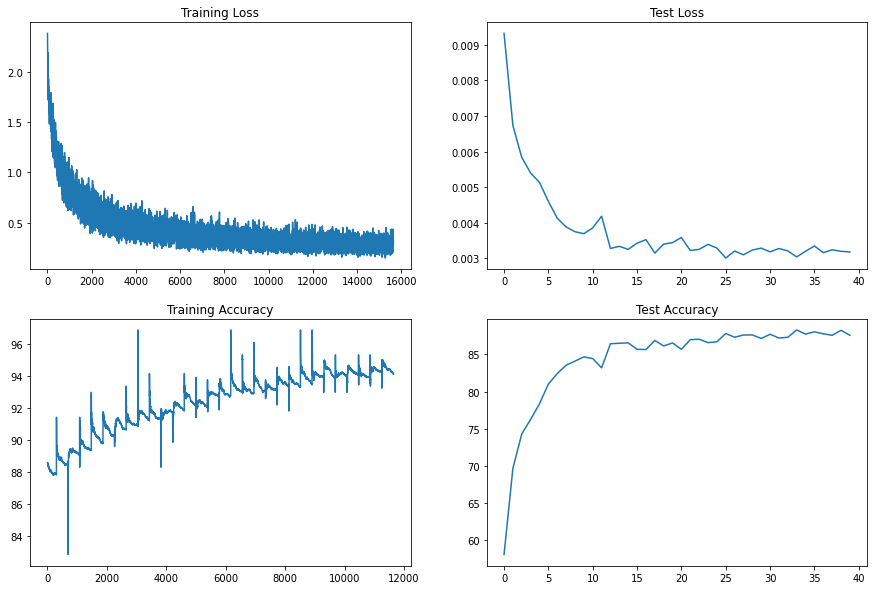

In [15]:
print("*"*50)
print("*"*10,"With Quiz9_DNN_Net model","*"*10)
print("*"*50)
print("\n Initializing...")
aug_l1_l2_reg_train_losses = []
aug_l1_l2_reg_test_losses = []
aug_l1_l2_reg_train_acc = []
aug_l1_l2_reg_test_acc = []
dropout_value = 0.0
LAMBDA1=1e-5
LR=0.01
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
inp_size = (3, 32, 32)
device = set_device()

print("Creating model...")
aug_l1_l2_model = Quiz9_DNN_Net(dropout_value).to(device)

print("\n Model Summary:")
summary(aug_l1_l2_model, input_size=inp_size)
optimizer = optim.SGD(aug_l1_l2_model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss()

print("\n Training the model...")
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(aug_l1_l2_model, device, train_loader, optimizer, criterion, epoch, aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, l1=True, lambda1=LAMBDA1)
    test(aug_l1_l2_model, device, criterion, test_loader, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)

print("\n Saving trained model...")
torch.save(aug_l1_l2_model.state_dict(), PATH+"/model/cifar10_aug_model_l1_l2.pth")

print("\n Visualizing:")
visualize_graph(aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)